In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
death = pd.read_csv("avg_deaths.csv")
death

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [46]:
import calendar

In [47]:
calendar.monthrange(2020,1)

(2, 31)

In [48]:
_,num_day =calendar.monthrange(2020,1)

In [49]:
num_day

31

In [50]:
death["num_days"] = 0

In [51]:
death["year"] = 2020

In [52]:
death

,Month,New_deaths,num_days,year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [53]:
death.columns

Index(['Month', 'New_deaths', 'num_days', 'year'], dtype='object')

In [54]:
death = death[['year','Month','num_days' ,'New_deaths', ]]

death

,year,Month,num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [55]:
death.columns = ['Year','Month','Num_days' ,'New_deaths', ]
death

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [56]:
def days(year,month):
    _,num_days = calendar.monthrange(year,month)
    return num_days

In [57]:
death.iloc[0]

Year          2020
Month            1
Num_days         0
New_deaths       0
Name: 0, dtype: int64

In [58]:
days = death[["Year","Month"]].apply(lambda row:days(row["Year"],row["Month"]) ,axis=1)
days

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [59]:
death.Num_days = days

In [60]:
death

,Year,Month,Num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [61]:
death.loc[11,"Num_days"]//=2

In [62]:
death

,Year,Month,Num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [63]:
death["Monthly_deaths"] = death.Num_days.mul(death.New_deaths)

In [64]:
death

,Year,Month,Num_days,New_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [65]:
death.rename({"New_deaths":"Avg_deaths"}, axis=1, inplace=True)

In [66]:
death

,Year,Month,Num_days,Avg_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [68]:
death["Cum_deaths"] = death.Monthly_deaths.cumsum()

In [69]:
death

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [79]:
death[:3]

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387


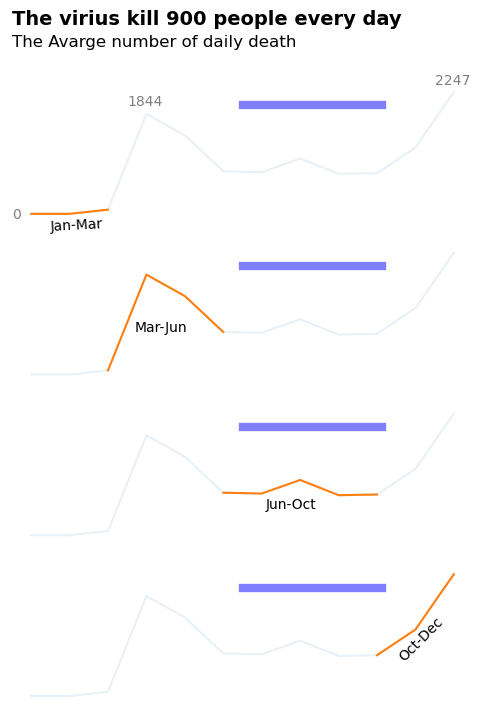

In [101]:
fig,(ax1,ax2,ax3,ax4 ) = plt.subplots(nrows = 4,ncols = 1,figsize=(6,8)) 
axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.plot(death["Month"],death["Avg_deaths"],alpha=0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom =False,left=False)
    for spines in ax.spines:
        ax.spines[spines].set_visible(False)
ax1.plot(death["Month"][:3],death["Avg_deaths"][:3])
ax1.text(x=0.5,y=-80,s="0",alpha =0.5)
ax1.text(x=3.5,y= 2000,s="1844",alpha =0.5)
ax1.text(x=11.5,y= 2400,s="2247",alpha =0.5)
ax1.text(x=1.5,y= -300,s="Jan-Mar",rotation=3)
ax1.text(0.5,3500,"The virius kill 900 people every day",size=14, weight = "bold")
ax1.text(0.5,3100,"The Avarge number of daily death" ,size=12)

ax2.plot(death["Month"][2:6],death["Avg_deaths"][2:6])
ax2.text(x=3.7,y= 800,s="Mar-Jun")

ax3.plot(death["Month"][5:10],death["Avg_deaths"][5:10])
ax3.text(x=7.1,y= 500,s="Jun-Oct")

ax4.plot(death["Month"][9:],death["Avg_deaths"][9:])
ax4.text(x=10.5,y= 660,s="Oct-Dec",rotation=45)
for ax in axes:
    ax.axhline(y=2000,xmin=0.5,xmax=0.8,c="blue",linewidth=6,alpha= 0.5)
plt.show()

In [96]:
cum_cases = [death.loc[2,"Cum_deaths"],death.loc[5,"Cum_deaths"],death.loc[9,"Cum_deaths"],death.loc[11,"Cum_deaths"]
            ]

In [97]:
cum_cases

[2387, 126145, 227055, 297510]

In [105]:
propotion = [round(i/cum_cases[-1],2) for i in cum_cases]
propotion

[0.01, 0.42, 0.76, 1.0]

In [110]:
propotion = []
for i in cum_cases:
    v = i/297510
    final = round(v,2)
    propotion.append(final)

In [111]:
propotion

[0.01, 0.42, 0.76, 1.0]